In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

In [ ]:
# reading in data
df = pd.read_csv('responses.csv')
df.columns

Index(['Timestamp', 'Are you a Mentor or Student?',
       'Mentor: What industry do you currently work in?',
       'Both: What region of the bay area do you work in?',
       'Mentee: Why do you want a mentor?',
       'Mentor: Why do you want to be a mentor?',
       'Both: What are your preferred gender/gender pronouns?',
       'Mentor: Years of Work Experience', 'Mentor: Company Size',
       'Mentor: Profession', 'Mentee: What track are you on?',
       'Both: What is your ethnicity? ',
       'Both: What growth areas would you like to share with your mentor/mentee?',
       'Both: Do you identify with any of the following groups?',
       'Mentor: Profession.1'],
      dtype='object')

In [ ]:
df = df.drop(['Mentor: Profession.1'], axis=1)

In [ ]:
# rename columns
df.columns = ['Timestamp','mOs','Mindustry','Bregion','mWhy','Mwhy',
              'gender', 'yearsExp', 'CompSize', 'Profession', 'track',
              'ethnicity', 'Growth', 'Groups']
df.columns

Index(['Timestamp', 'mOs', 'Mindustry', 'Bregion', 'mWhy', 'Mwhy', 'gender',
       'yearsExp', 'CompSize', 'Profession', 'track', 'ethnicity', 'Growth',
       'Groups'],
      dtype='object')

In [ ]:
df.head()

,Timestamp,mOs,Mindustry,Bregion,mWhy,Mwhy,gender,yearsExp,CompSize,Profession,track,ethnicity,Growth,Groups
0,3/30/2020 13:25:48,Mentor,finance,Marin,NaN,Develop Leadership Qualities,she/her,6-9 years,"1,000 - 5,000 employees",Business Development,NaN,Hispanic or Latinx,Networking,LGBTQ+
1,3/30/2020 13:27:16,Student,finance,Alameda,Develop Leadership Qualities,NaN,he/him,NaN,NaN,NaN,Financial Operations,Native American or American Indian,Communication,Female-Identifying
2,3/30/2020 14:37:30,Mentor,technology,Santa Clara,NaN,Reinforce Industry Knowledge,she/her,3-5 years,"1,000 - 5,000 employees",UX/UI Design,NaN,Asian,Professional Development,"Person of Color, Female-Identifying"
3,3/30/2020 14:38:39,Student,NaN,Contra Costa,Reinforce Industry Knowledge,NaN,she/her,NaN,NaN,NaN,Financial Operations,Caucasion,Technical Skills,"Female-Identifying, Person living with a Disab..."
4,3/30/2020 14:56:15,Mentor,technology,San Mateo,NaN,Improving Communication Skills,she/her,3-5 years,"100 - 1,000 employees",Project Management,NaN,Asian,Networking,Immigrant


In [ ]:
# mapping "why you want/be a mentor to one column"
var = pd.DataFrame(df['mOs'])
var = var.join(df['mWhy'])
var = var.join(df['Mwhy'])

# looping through df to match mentor and mentee why to 1 array
new_col =[]
for index, row in var.iterrows():
    if(row['mOs'] == 'Mentor'):
        new_col.append(row['Mwhy'])
    else:
        new_col.append(row['mWhy'])

# creating new column of combined why with new column arry
var['combined_why'] = new_col
var['combined_why'].fillna("Enhance CV", inplace = True) # replacing nulls

# adding profession and track columns
var = var.join(df['Profession'])
var = var.join(df['track'])

In [ ]:
var.head()

,mOs,mWhy,Mwhy,combined_why,Profession,track
0,Mentor,NaN,Develop Leadership Qualities,Develop Leadership Qualities,Business Development,NaN
1,Student,Develop Leadership Qualities,NaN,Develop Leadership Qualities,NaN,Financial Operations
2,Mentor,NaN,Reinforce Industry Knowledge,Reinforce Industry Knowledge,UX/UI Design,NaN
3,Student,Reinforce Industry Knowledge,NaN,Reinforce Industry Knowledge,NaN,Financial Operations
4,Mentor,NaN,Improving Communication Skills,Improving Communication Skills,Project Management,NaN


In [ ]:
# mapping profession to track in a new column

mappedprofs = {'Data and Analytics': 'IT', 'Help Desk':'IT', 'Cyber Security':'IT', 'Quality Assurance':'IT', 'Operations':'Financial Operations', 'Finance':'Financial Operations', 'Anti-Money Laundering':'Financial Operations', 
                'Community Management':'Sales and Customer Support', 'Marketing':'Sales and Customer Support', 'Customer Support':'Sales and Customer Support', 'Educator':'Sales and Customer Support', 'Project Management':'Business Operations', 'Content':'Business Operations', 'Media Production':'Business Operations', 
                'Business Development':'Business Operations', 'Sales':'Sales and Customer Support', 'Human Resources':'Business Operations', 'Executive or Founder':'Business Operations', 'Engineering':'Software Development', 'Visual Design':'Software Development', 'UX/UI Design':'Software Development', 'Product Management':'Software Development'}

maptracks = []
for index,row in var.iterrows(): 
  if(row['mOs'] == 'Mentor'):
       maptracks.append(mappedprofs[row['Profession']])
  else:
       maptracks.append(row['track'])

var['combined_track'] = maptracks
var['combined_track'].fillna("IT", inplace = True) # replacing nulls


In [ ]:
var.head()

,mOs,mWhy,Mwhy,combined_why,Profession,track,combined_track
0,Mentor,NaN,Develop Leadership Qualities,Develop Leadership Qualities,Business Development,NaN,Business Operations
1,Student,Develop Leadership Qualities,NaN,Develop Leadership Qualities,NaN,Financial Operations,Financial Operations
2,Mentor,NaN,Reinforce Industry Knowledge,Reinforce Industry Knowledge,UX/UI Design,NaN,Software Development
3,Student,Reinforce Industry Knowledge,NaN,Reinforce Industry Knowledge,NaN,Financial Operations,Financial Operations
4,Mentor,NaN,Improving Communication Skills,Improving Communication Skills,Project Management,NaN,Business Operations


In [ ]:
# create a dataframe with columns to be used for matching 
match_df1 = df[['mOs', 'Bregion', 'gender', 'ethnicity', 'Growth', 'Groups']]
match_df2 = var[['combined_why', 'combined_track']]

In [ ]:
# match dataframe combined!
match_df = match_df1.join(match_df2)
match_df.head()

,mOs,Bregion,gender,ethnicity,Growth,Groups,combined_why,combined_track
0,Mentor,Marin,she/her,Hispanic or Latinx,Networking,LGBTQ+,Develop Leadership Qualities,Business Operations
1,Student,Alameda,he/him,Native American or American Indian,Communication,Female-Identifying,Develop Leadership Qualities,Financial Operations
2,Mentor,Santa Clara,she/her,Asian,Professional Development,"Person of Color, Female-Identifying",Reinforce Industry Knowledge,Software Development
3,Student,Contra Costa,she/her,Caucasion,Technical Skills,"Female-Identifying, Person living with a Disab...",Reinforce Industry Knowledge,Financial Operations
4,Mentor,San Mateo,she/her,Asian,Networking,Immigrant,Improving Communication Skills,Business Operations


In [ ]:
match_df.shape

(52, 8)

In [ ]:
######## BLOCKER!!!
# for column in match_df.columns:
#     fdf = pd.get_dummies(match_df[column])
#     # print(fdf)
#     match_hot_df = match_df.append(fdf)
#     print(match_hot_df)
#     # match_hot_df = pd.concat([match_hot_df÷,fdf])

In [ ]:
# applying one hot encoding to column data
m = pd.get_dummies(match_df.mOs)
r = pd.get_dummies(match_df.Bregion)
e = pd.get_dummies(match_df.ethnicity)
grow = pd.get_dummies(match_df.Growth)
group = pd.get_dummies(match_df.Groups)
w = pd.get_dummies(match_df.combined_why)
t = pd.get_dummies(match_df.combined_track)

In [ ]:
one_hot_final = m.join(r)
one_hot_final = one_hot_final.join(e)
one_hot_final = one_hot_final.join(grow)
one_hot_final = one_hot_final.join(group)
one_hot_final = one_hot_final.join(w)
one_hot_final = one_hot_final.join(t)

In [ ]:
# exporting survey data to csv
# one_hot_final.to_csv('survey_one_hot_encoded.csv', index=False)

In [ ]:
one_hot_final.head()

,Mentor,Student,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,...,Develop Leadership Qualities,Enhance CV,Improving Communication Skills,Learn to deal with Personal/Academic Issues,Reinforce Industry Knowledge,Business Operations,Financial Operations,IT,Sales and Customer Support,Software Development
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
sum(one_hot_final['Mentor'])

26

In [ ]:
sum(one_hot_final['Student'])

26

In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# %matplotlib inline
# from sklearn import datasets
# #Iris Dataset
# #X = one_hot_final
# #KMeans
# #km = KMeans(n_clusters=26)
# #km.fit(X)
# #km.predict(X)
# labels = km.labels_

In [ ]:
# X['labels'] = labels

In [ ]:
# X[['Mentor', 'Student', 'labels']]

In [ ]:
# plt.hist(labels)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
#Iris Dataset
Y = one_hot_final
Y = Y.drop(['Mentor', 'Student'], axis=1)
#KMeans
km = KMeans(n_clusters=26)
km.fit(Y)
km.predict(Y)
labels_b = km.labels_

(array([10.,  8.,  6.,  3.,  5.,  2.,  5.,  6.,  4.,  3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

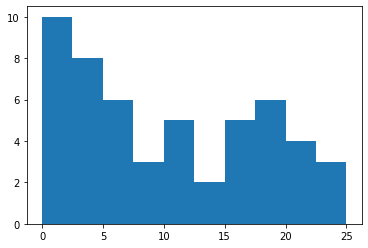

In [ ]:
plt.hist(labels_b)

In [ ]:
one_hot_final['labels_kmeans'] = labels_b

In [ ]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data

km = KModes(n_clusters=25, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(Y)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 86.0
Run 1, iteration: 2/100, moves: 0, cost: 86.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11, cost: 101.0
Run 2, iteration: 2/100, moves: 1, cost: 99.0
Run 2, iteration: 3/100, moves: 0, cost: 99.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5, cost: 95.0
Run 3, iteration: 2/100, moves: 1, cost: 93.0
Run 3, iteration: 3/100, moves: 0, cost: 93.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5, cost: 105.0
Run 4, iteration: 2/100, moves: 1, cost: 104.0
Run 4, iteration: 3/100, moves: 0, cost: 104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8, cost: 94.0
Run 5, iteration: 2/100, moves: 2, cost: 93

In [ ]:
one_hot_final['labels_kmodes'] = clusters

(array([7., 7., 5., 7., 5., 4., 2., 5., 3., 7.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

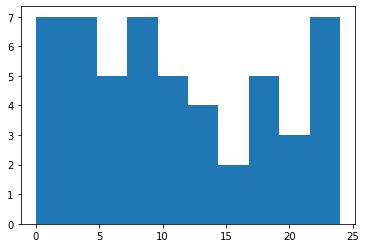

In [ ]:
plt.hist(clusters)

In [ ]:
one_hot_final.to_csv('matches_kmeans_kmodes.csv', index=False)

In [ ]:
Y.head()

,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma,Asian,...,Develop Leadership Qualities,Enhance CV,Improving Communication Skills,Learn to deal with Personal/Academic Issues,Reinforce Industry Knowledge,Business Operations,Financial Operations,IT,Sales and Customer Support,Software Development
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
